In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

## Importing Data and Overview

In [2]:
df = pd.read_csv('/Users/Shared/Shyam/Datasets/fraud_data.csv')

In [3]:
pd.set_option('max_columns' , 500)

In [4]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [5]:
#Resetting Index to TransactionID

df = df.set_index('TransactionID')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 393 entries, isFraud to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.7+ GB


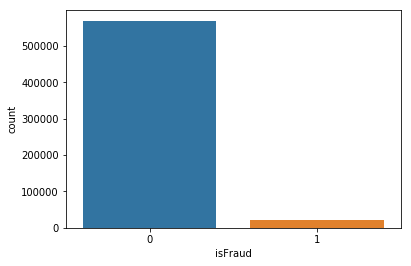

In [7]:
#Distribution of Target Variable

sns.countplot(df.isFraud)

## Handling Missing Values

In [8]:
#Checking for null values

(df.isnull().sum()/len(df) * 100).sort_values(ascending = False)

dist2             93.628374
D7                93.409930
D13               89.509263
D14               89.469469
D12               89.041047
D6                87.606767
D8                87.312290
D9                87.312290
V153              86.123717
V148              86.123717
V149              86.123717
V158              86.123717
V147              86.123717
V154              86.123717
V155              86.123717
V146              86.123717
V161              86.123717
V142              86.123717
V162              86.123717
V163              86.123717
V157              86.123717
V141              86.123717
V140              86.123717
V139              86.123717
V138              86.123717
V156              86.123717
V164              86.122701
V160              86.122701
V159              86.122701
V143              86.122701
                    ...    
V311               0.002032
V312               0.002032
V316               0.002032
V317               0.002032
V319               0

In [9]:
#Removing columns with more than 70% missing values

df = df.loc[: , df.isnull().sum()/len(df) < 0.7]

In [10]:
#Seperating numerical and categorical variables

numerical = df.select_dtypes(include = ['float64' , 'int64'])
categorical = df.select_dtypes(include = ['object'])

In [11]:
numerical.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,514518.000000,311253.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000
mean,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,

In [12]:
categorical.describe()

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,590540,588963,588969,496084,319440,319440,319440,309096,240058,421180,244275,244288,244288
unique,5,4,4,59,2,2,2,3,2,2,2,2,2
top,W,visa,debit,gmail.com,T,T,T,M0,F,F,F,F,T
freq,439670,384767,439938,228355,319415,285468,251731,196405,132491,227856,211374,155251,205656


In [13]:
#Splitting features into 2 parts

v_df = df.iloc[: , 45:]
df1 = df.iloc[: , :45]

#### Preparing categorical data and handling missing values of first part

In [14]:
df1['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
windstream.net         305
roadrunner.com         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
twc.com                230
n

In [15]:
#Reducing unique values

df1['P_emaildomain'] = df1['P_emaildomain'].replace('gmail' , 'gmail.com')  

df1['P_emaildomain'] = df1['P_emaildomain'].replace(['ymail.com' , 'yahoo.com.mx' , 'yahoo.fr' , 'yahoo.es' , 
                                                   'yahoo.de' , 'yahoo.co.uk' , 'yahoo.co.jp'] , 'yahoo.com')


df1['P_emaildomain'] = df1['P_emaildomain'].replace(['hotmail.es' , 'hotmail.fr' , 'hotmail.co.uk' , 
                                                   'hotmail.de'] , 'hotmail.com')      

df1['P_emaildomain'] = df1['P_emaildomain'].replace(['comcast.net' , 'icloud.com' , 'outlook.com' , 'msn.com' , 
                                                   'att.net' , 'live.com' , 'sbcglobal.net' , 'verizon.net' , 
                                                   'bellsouth.net' , 'me.com' , 'cox.net' , 'optonline.net' , 
                                                   'charter.net' , 'live.com.mx' , 'rocketmail.com' , 
                                                   'mail.com' , 'earthlink.net' , 'outlook.es' , 'mac.com' , 
                                                   'juno.com' , 'aim.com' , 'roadrunner.com' , 
                                                   'windstream.net' , 'frontier.com' , 'embarqmail.com' , 
                                                   'web.de' , 'twc.com' , 'netzero.com' , 'prodigy.net.mx' , 
                                                   'centurylink.net' , 'netzero.net' , 'frontiernet.net' , 
                                                   'q.com' , 'suddenlink.net' , 'cfl.rr.com' , 'sc.rr.com' , 
                                                   'cableone.net' , 'gmx.de' , 'protonmail.com' , 'ptd.net' , 
                                                   'live.fr' , 'servicios-ta.com'] , 'others')  
df1['P_emaildomain'].value_counts()

gmail.com        228851
yahoo.com        105305
others            50636
hotmail.com       46005
anonymous.com     36998
aol.com           28289
Name: P_emaildomain, dtype: int64

In [16]:
#Encoding

import category_encoders as ce

oe = ce.ordinal.OrdinalEncoder(handle_missing = 'return_nan')
df1[categorical.columns] = oe.fit_transform(df1[categorical.columns])

In [17]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False)

dist1             59.652352
M5                59.349409
M7                58.635317
M8                58.633115
M9                58.633115
D5                52.467403
M4                47.658753
D2                47.549192
D11               47.293494
M1                45.907136
M2                45.907136
M3                45.907136
D3                44.514851
M6                28.678836
D4                28.604667
P_emaildomain     15.994852
D15               15.090087
D10               12.873302
addr2             11.126427
addr1             11.126427
card2              1.512683
card5              0.721204
card4              0.267044
card6              0.266028
card3              0.265012
D1                 0.214888
ProductCD          0.000000
card1              0.000000
TransactionAmt     0.000000
TransactionDT      0.000000
C9                 0.000000
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0

In [18]:
#Selecting features for imputation and also seperating features with no null values

impute_features = df1.loc[: , df1.notnull().all()].columns
null_features = ['dist1' , 'M5' , 'M7' , 'M8' , 'M9' , 'D5' , 'M4' , 'D2' , 'D11' , 'M1' , 'M2' , 'M3' , 'D3' ,
                 'M6' , 'D4']
print('Non null features:\n' , impute_features)
print('Features with null:\n' , null_features)

Non null features:
 Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14'],
      dtype='object')
Features with null:
 ['dist1', 'M5', 'M7', 'M8', 'M9', 'D5', 'M4', 'D2', 'D11', 'M1', 'M2', 'M3', 'D3', 'M6', 'D4']


In [19]:
#Imputing missing values of select features

from sklearn.ensemble import RandomForestRegressor


def impute(feature):
    
    data_without_null = df1[pd.isnull(df1[feature]) == False]
    data_with_null = df1[pd.isnull(df1[feature])]
    
                             
    rf_model = RandomForestRegressor()
    rf_model.fit(data_without_null[impute_features] , data_without_null[feature])
    
    imputed_val = rf_model.predict(data_with_null[impute_features])
    
    data_with_null[feature] = imputed_val.astype(int)
    
    imputed = data_without_null.append(data_with_null)
    df1[feature] = imputed[feature]
    
for feature in null_features:
    impute(feature)

/Users/Shared/Shyam/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Shared/Shyam/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Shared/Shyam/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [20]:
#Replacing missing values of remaining features

df1 = df1.interpolate(method = 'linear')
df1 = df1.fillna(method = 'bfill')
df1.isnull().any().sum()

0

#### Handling missing values of second part and dimensionality reduction

In [21]:
v_df = v_df.interpolate(method = 'linear')
v_df = v_df.fillna(method = 'bfill')

v_df.isnull().any().sum()

0

In [22]:
#Scaling data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_v = scaler.fit_transform(v_df)

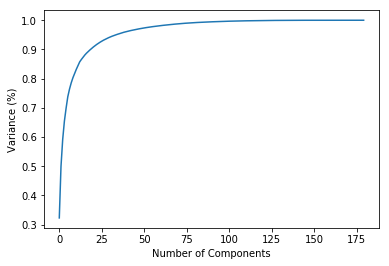

In [23]:
#Finding optimum n_components for PCA

from sklearn.decomposition import PCA

pca = PCA().fit(scaled_v)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.show()


In [24]:
#Applying PCA

pca = PCA(n_components = 30)
v_reduced = pd.DataFrame(pca.fit_transform(scaled_v))
v_reduced.shape

(590540, 30)

#### Merging both parts to prepare final feature set

In [25]:
#Scaling part 1
scaled_part1 = scaler.fit_transform(df1)
scaled_part1 = pd.DataFrame(scaled_part1 , columns = df1.columns)
scaled_part1.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,0.0,0.000000e+00,0.002137,0.00,0.743044,0.608,0.381679,0.000000,0.306569,0.00,0.488636,0.836957,0.001847,0.0,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0000,0.004762,0.000000,0.000627,0.0,0.000343,0.0007,0.021875,0.165625,0.015873,0.176589,0.081807,0.014840,0.091286,0.086279,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,6.359409e-08,0.000900,0.00,0.100885,0.608,0.381679,0.333333,0.014599,0.00,0.511364,0.836957,0.176745,0.0,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0000,0.000000,0.000000,0.000314,0.0,0.000343,0.0007,0.000000,0.340625,0.224664,0.123108,0.335775,0.000000,0.356846,0.086279,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0
2,0.0,4.387992e-06,0.001840,0.00,0.210566,0.780,0.381679,0.666667,0.481752,0.25,0.522727,0.836957,0.027902,0.2,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.000343,0.0007,0.000000,0.150000,0.130647,0.123108,0.343101,0.000000,0.508990,0.413721,0.0,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0
3,0.0,6.295815e-06,0.001558,0.00,0.984824,0.934,0.381679,0.333333,0.124088,0.25,0.854545,0.836957,0.063776,0.4,0.000427,0.000879,0.0,0.0,0.0,0.001775,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.008568,0.0007,0.175000,0.175000,0.000000,0.217962,0.000000,0.095890,0.502075,0.201663,0.0,0.0,0.0,0.333333,1.0,1.0,0.0,0.0,0.0
4,0.0,6.740974e-06,0.001558,0.25,0.201023,0.828,0.381679,0.333333,0.014599,0.00,0.727273,0.836957,0.164884,0.0,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0003,0.000000,0.000307,0.000314,0.0,0.000343,0.0007,0.000000,0.006250,0.218559,0.123108,0.004884,0.047945,0.181189,0.143971,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0


In [26]:
#Merging

final_data = pd.concat([scaled_part1 , v_reduced] , join = 'inner' , axis = 1)
final_data.shape

(590540, 75)

## Undersampling and applying Random Forest

In [27]:
#Splitting data into train and test sets

from sklearn.model_selection import train_test_split

X = final_data.drop('isFraud' , axis = 1)
y = final_data.isFraud

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , stratify = y.values)

In [28]:
#Sampling training data

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_res , y_res = rus.fit_sample(X_train , y_train)

Using TensorFlow backend.


In [29]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score

random_model = RandomForestClassifier(n_estimators = 80, random_state = 42)
random_model.fit(X_res , y_res)
prediction_forest = random_model.predict(X_test)
score_forest = cross_val_score(random_model , X_res , y_res , cv = 10 , scoring = 'accuracy').mean()
print(classification_report(y_test , prediction_forest))
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_forest) ,sep = '\n')
print('\nAccuracy: ' , accuracy_score(y_test , prediction_forest))
print('\nCross Validation Score: ' , score_forest)

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94    170963
         1.0       0.23      0.88      0.36      6199

    accuracy                           0.89    177162
   macro avg       0.61      0.89      0.65    177162
weighted avg       0.97      0.89      0.92    177162


Confusion matrix: 
[[152794  18169]
 [   766   5433]]

Accuracy:  0.893120420857746

Cross Validation Score:  0.8798392313396338


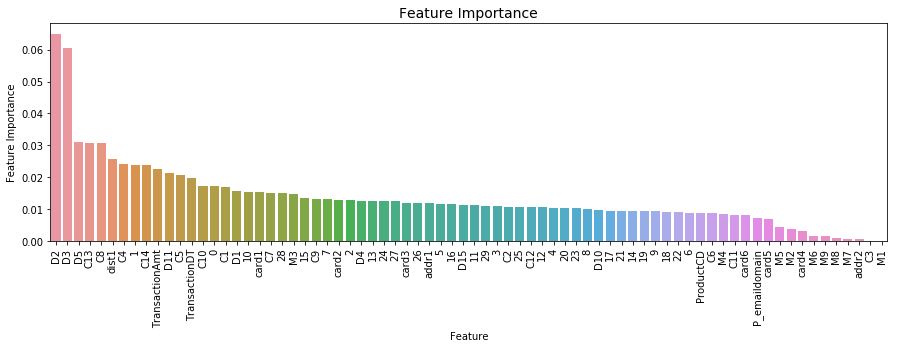

In [30]:
#Feature importance

features = final_data.drop('isFraud' , axis = 1).columns
tmp = pd.DataFrame({'Feature' : features , 'Feature Importance' : random_model.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance' , ascending=False)
plt.figure(figsize = (15 , 4))
plt.title('Feature Importance' , fontsize = 14)
s = sns.barplot(x = 'Feature' , y = 'Feature Importance' , data = tmp)
s.set_xticklabels(s.get_xticklabels() , rotation = 90)
plt.show()  